#Penguin classification
I have information on the size of features for various individual penguins, each tagged with their corresponding species. The aim of this project is to develop a machine learning classifier that, given the numerical information of a penguin, can identify to which species it belongs.
First, I will explore the data using various graphs to visualize underlying patterns and understand the distribution. Based on this analysis, I will choose a machine learning algorithm that can generate the most effective classifier for this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express    as px
import seaborn           as sns

%matplotlib inline
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
import warnings
warnings.filterwarnings('ignore')

##Exploratory data analysis

In [3]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
penguins['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [6]:
penguins = penguins.dropna()
penguins = penguins[penguins['sex']!='.']

penguins.shape

(333, 7)

Here I clean all the NaN values in the data to have a clean dataset

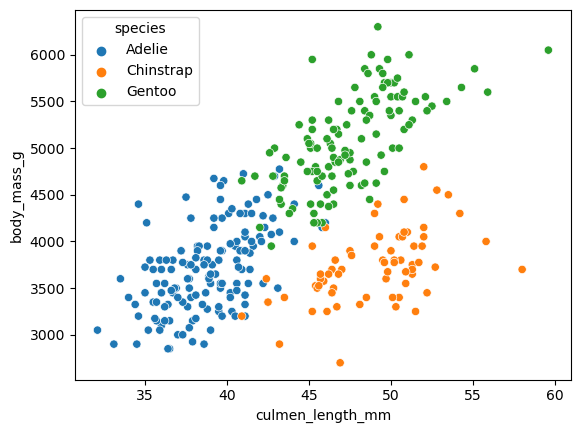

In [7]:
sns.scatterplot(penguins, x = 'culmen_length_mm', y = 'body_mass_g', hue = 'species')
plt.show()

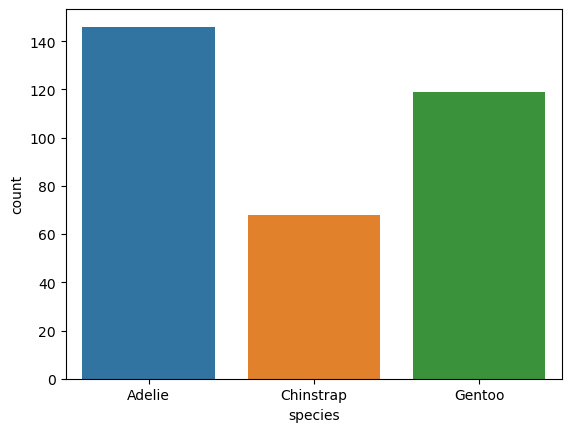

In [8]:
sns.countplot(penguins, x = 'species')
plt.show()

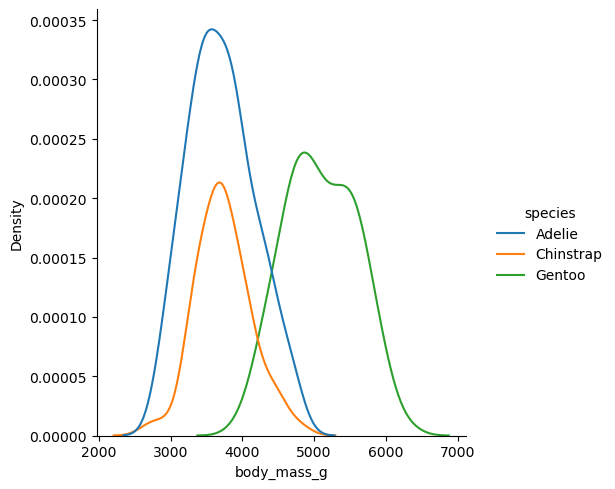

In [9]:
sns.displot(penguins, x='body_mass_g', hue='species', kind='kde')
plt.show()

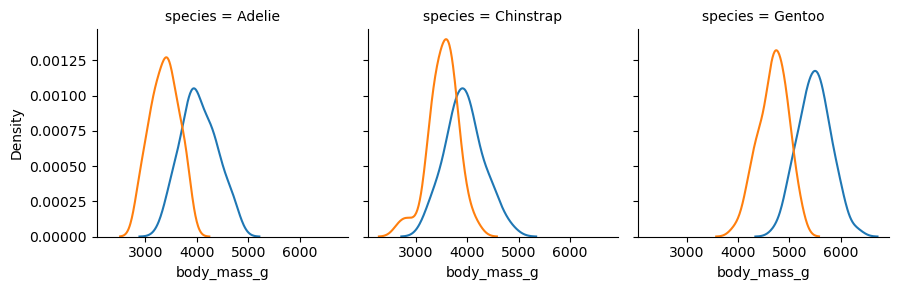

In [10]:
g = sns.FacetGrid(penguins, col='species', margin_titles=True, hue = 'sex')
g.map(sns.kdeplot, 'body_mass_g')

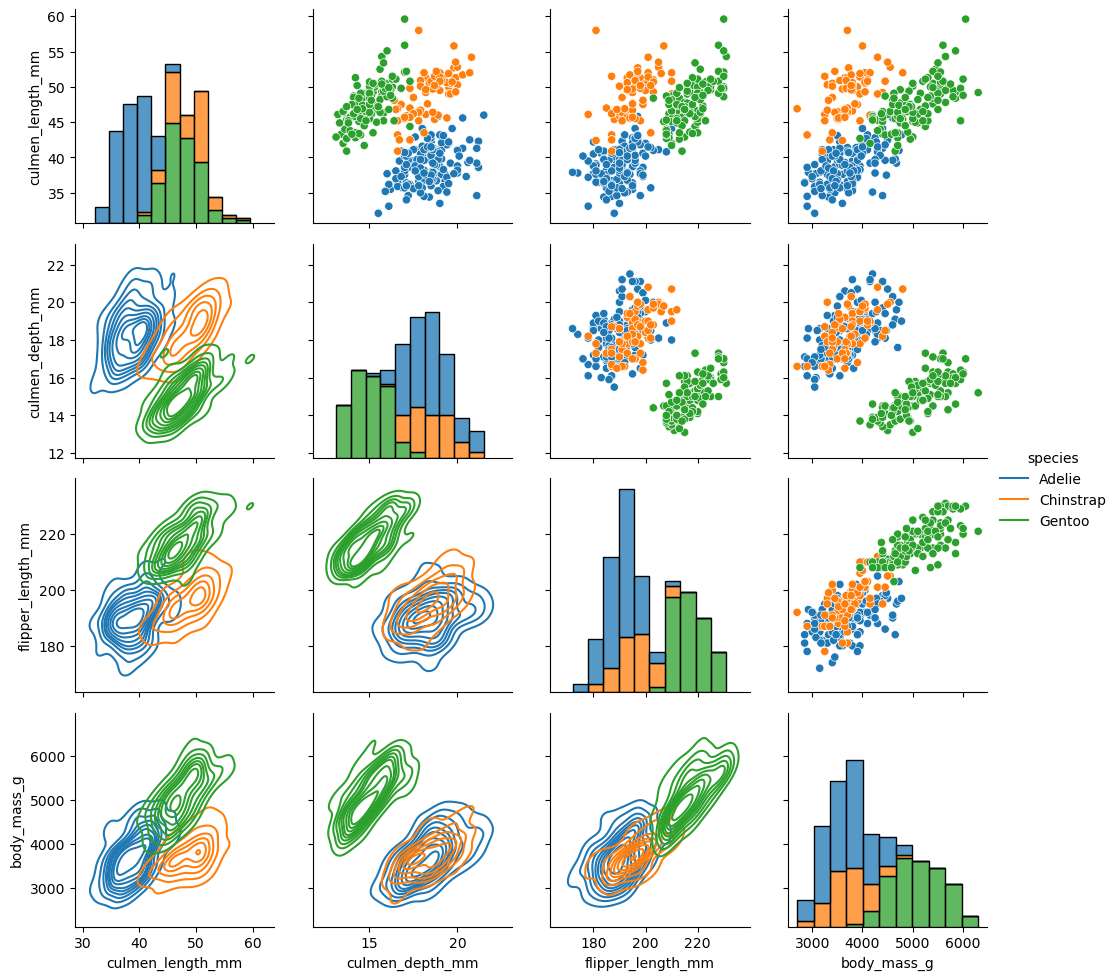

In [11]:
g = sns.PairGrid(penguins, hue='species')
g.map_diag(sns.histplot, multiple = 'stack')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

This grid plot aims to visualize the distribution of species across the numerical values used to describe them. Therefore, I believe that for creating a classifier model to identify the species based on these numerical values, the K-nearest neighbors algorithm is the most suitable.

In [12]:
label = ['species']
x_col = np.array(penguins.columns)
delete_index = [np.where(x_col=='species'),np.where(x_col=='island')]
x_col = np.delete(x_col, delete_index)

In [13]:
x_penguins = penguins[x_col]
x_penguins['sex'].replace(['MALE','FEMALE'],[0,1],inplace = True)
x_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,0
342,45.2,14.8,212.0,5200.0,1


##K Means Classifier

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
#Before I partition the data, I scale it to have it done so for the cross valdiation

scaler = StandardScaler()
x_penguins = scaler.fit_transform(x_penguins)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_penguins, penguins[label], test_size=0.2, random_state=13)

In [17]:
# I choose k = 3 because I want to see at first how the data is fited into the model, but later I'm going to evaluate different k values
k = 3 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = knn_classifier.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[33  0  0]
 [ 0 12  0]
 [ 0  0 22]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        33
   Chinstrap       1.00      1.00      1.00        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Here I make a graphic comparing the results for a cross validation across different values of k. The aim is to evaluate if the k choosen is a value that throws the most accuracy possible.

In [20]:
k_values = range(1,15)
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, x_penguins, penguins[label], cv=5)
    accuracy_scores.append(cv_scores.mean())
    
g = sns.lineplot(accuracy_scores, dashes=False, marker='o')

NameError: name 'cross_val_score' is not defined

As I can see, the results are that 1 and 3 are values for k which generate the most accuracy. In K nearest neighbors is important that the k value is odd in order to get a clear a mayority when selecting the class, this is why values like 2 and 4 drop in the accuracy.
The model created above is a strong and robust model for the problem at hand and will let us predict information about the penguins species.